# Classification for 10 classes of different animals 

---
<img src="https://www.animals-wd.com/wp-content/uploads/2017/11/23622204_1267778633367489_3793580533559745001_n.jpg">


# Import libraries

---

In [43]:
import numpy as np 
import pandas as pd 
import os
import cv2
import datetime
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from matplotlib.image import imread
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Grad-CAM Implementation

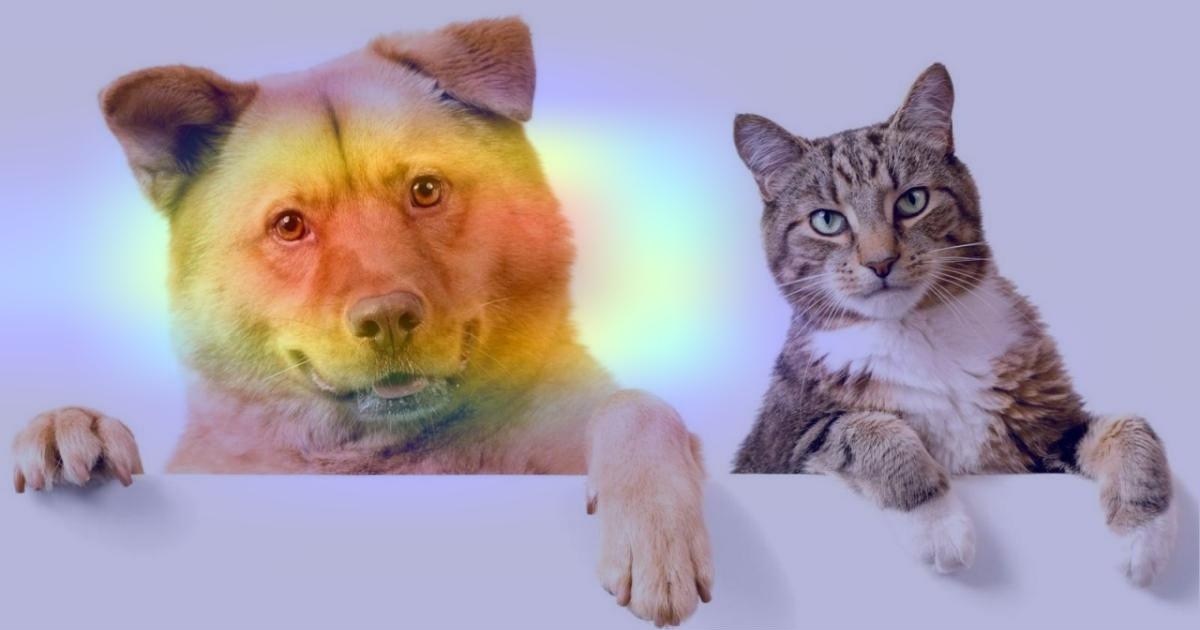

# Show samples of data
---
### Illustration : the names of classes in italian language but this not has any effect 

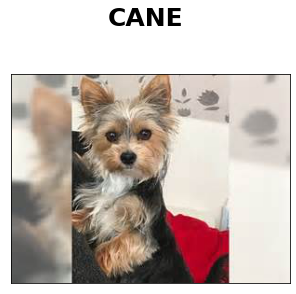

In [2]:
cane_sample = imread("/kaggle/input/animals10/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(cane_sample)
plt.suptitle('CANE', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

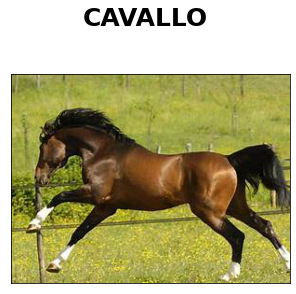

In [3]:
cavallo_sample = imread("/kaggle/input/animals10/raw-img/cavallo/OIP---MGqQIhmz3OEPYP-46_xwHaFj.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(cavallo_sample)
plt.suptitle('CAVALLO', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

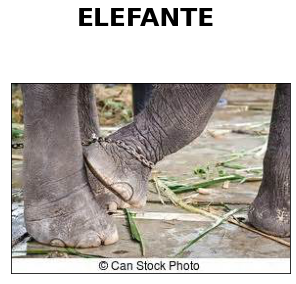

In [4]:
elefante_sample = imread("/kaggle/input/animals10/raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(elefante_sample)
plt.suptitle('ELEFANTE', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

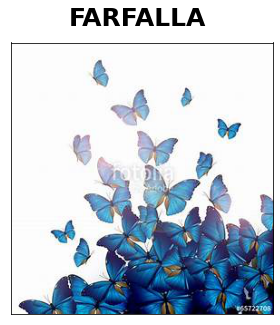

In [5]:
farfalla_sample = imread("/kaggle/input/animals10/raw-img/farfalla/OIP--04ndbWy7I04gsPgu9qOeQHaHs.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(farfalla_sample)
plt.suptitle('FARFALLA', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

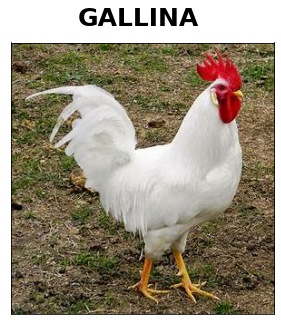

In [6]:
gallina_sample = imread("/kaggle/input/animals10/raw-img/gallina/10.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(gallina_sample)
plt.suptitle('GALLINA', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

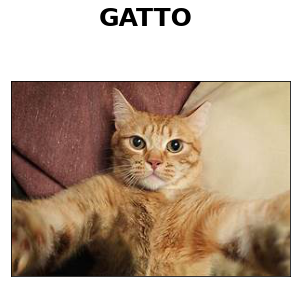

In [7]:
gatto_sample = imread("/kaggle/input/animals10/raw-img/gatto/1.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(gatto_sample)
plt.suptitle('GATTO', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

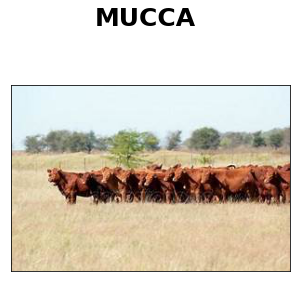

In [8]:
mucca_sample = imread("/kaggle/input/animals10/raw-img/mucca/OIP---lAIbDlHKmejDpqrXq6vAAAAA.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(mucca_sample)
plt.suptitle('MUCCA', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

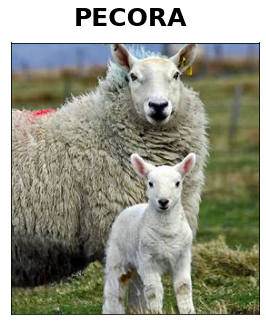

In [9]:
pecora_sample = imread("/kaggle/input/animals10/raw-img/pecora/OIP--5EOVD9HIiHEqNd8PZjFogHaII.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(pecora_sample)
plt.suptitle('PECORA', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

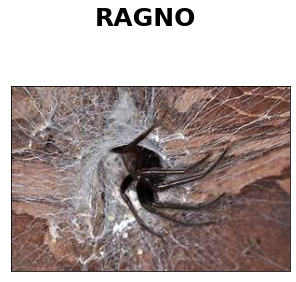

In [10]:
ragno_sample = imread("/kaggle/input/animals10/raw-img/ragno/OIP--1GKxNzkhVbR_eyVRCdp9QHaE6.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(ragno_sample)
plt.suptitle('RAGNO', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

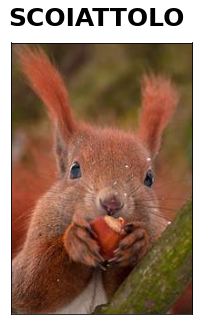

In [11]:
scoiattolo_sample = imread("/kaggle/input/animals10/raw-img/scoiattolo/OIP--0Yr2a_yg2hs5QgCoHAOnAHaLJ.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(scoiattolo_sample)
plt.suptitle('SCOIATTOLO', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

# Creating DataFrame

---

In [12]:
def create_dataframe(data_path):
    df=[]
    for c in os.listdir(data_path):
        f_path=os.path.join(data_path,c)
        for img in os.listdir(f_path):
            img_path=os.path.join(f_path,img)
            if img_path.endswith('.jpeg'):
                df.append([img_path,c])
    return pd.DataFrame(df,columns=('filename','class'))
        

In [290]:
np.random.seed(40)
batch_size = 32
img_size = 224
Epochs=30
data_path='/kaggle/input/animals10/'
classes = sorted(['cane','cavallo','elefante','farfalla', 'gallina','gatto','mucca','pecora', 'ragno', 'scoiattolo'])
class_dict={0:"cane",
           1:"cavallo",
           2:"elefante",
           3:"farfalla",
           4:"gallina",
           5:"gatto",
           6:"mucca",
           7:"pecora",
           8:"ragno",
           9:"scoiattolo"}
print(classes)


['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [14]:
df=create_dataframe(os.path.join(data_path,'raw-img'))
df.head()

filename    class
0  /kaggle/input/animals10/raw-img/cavallo/OIP-md...  cavallo
1  /kaggle/input/animals10/raw-img/cavallo/OIP-TP...  cavallo
2  /kaggle/input/animals10/raw-img/cavallo/OIP-jl...  cavallo
3  /kaggle/input/animals10/raw-img/cavallo/OIP-F4...  cavallo
4  /kaggle/input/animals10/raw-img/cavallo/OIP-UF...  cavallo

# Spliting data to train,validation and test

---

In [15]:
from sklearn.model_selection import train_test_split
df_train,df_val=train_test_split(df,test_size=0.1,random_state=0)
df_train,df_test=train_test_split(df_train,test_size=0.1,random_state=0)

In [16]:
df_train

filename       class
7902   /kaggle/input/animals10/raw-img/scoiattolo/OIP...  scoiattolo
11029  /kaggle/input/animals10/raw-img/gallina/OIP-Ln...     gallina
12158  /kaggle/input/animals10/raw-img/ragno/OIP-ECk9...       ragno
22431  /kaggle/input/animals10/raw-img/cane/OIP-u8v9g...        cane
12571  /kaggle/input/animals10/raw-img/ragno/OIP-BE0I...       ragno
...                                                  ...         ...
9968   /kaggle/input/animals10/raw-img/gallina/OIP-Gs...     gallina
16029  /kaggle/input/animals10/raw-img/mucca/OIP-YoNU...       mucca
18741  /kaggle/input/animals10/raw-img/cane/OIP-rpgOx...        cane
2000   /kaggle/input/animals10/raw-img/cavallo/OIP-eL...     cavallo
8859   /kaggle/input/animals10/raw-img/gallina/OIP-Cf...     gallina

[19609 rows x 2 columns]

In [17]:
df_val

filename    class
3834   /kaggle/input/animals10/raw-img/pecora/OIP-pnA...   pecora
845    /kaggle/input/animals10/raw-img/cavallo/OIP-K_...  cavallo
20403  /kaggle/input/animals10/raw-img/cane/OIP-iyLzl...     cane
22     /kaggle/input/animals10/raw-img/cavallo/OIP-Vv...  cavallo
11303  /kaggle/input/animals10/raw-img/gallina/OIP-Rp...  gallina
...                                                  ...      ...
2188   /kaggle/input/animals10/raw-img/cavallo/OIP-bO...  cavallo
1088   /kaggle/input/animals10/raw-img/cavallo/OIP-7J...  cavallo
19127  /kaggle/input/animals10/raw-img/cane/OIP-WunXB...     cane
9249   /kaggle/input/animals10/raw-img/gallina/OIP-tj...  gallina
3236   /kaggle/input/animals10/raw-img/pecora/OIP-hzZ...   pecora

[2421 rows x 2 columns]

In [18]:
df_test

filename       class
6334     /kaggle/input/animals10/raw-img/gatto/1739.jpeg       gatto
7676   /kaggle/input/animals10/raw-img/scoiattolo/OIP...  scoiattolo
11918  /kaggle/input/animals10/raw-img/ragno/OIP-iITk...       ragno
15917  /kaggle/input/animals10/raw-img/mucca/OIP-njTm...       mucca
9886   /kaggle/input/animals10/raw-img/gallina/OIP-zQ...     gallina
...                                                  ...         ...
588    /kaggle/input/animals10/raw-img/cavallo/OIP-mN...     cavallo
18473  /kaggle/input/animals10/raw-img/cane/OIP-qSsCk...        cane
15378  /kaggle/input/animals10/raw-img/ragno/OIP-TPOL...       ragno
4421   /kaggle/input/animals10/raw-img/elefante/OIP-S...    elefante
4377   /kaggle/input/animals10/raw-img/elefante/OIP-E...    elefante

[2179 rows x 2 columns]

# Data generators (reading data from disk)

---



In [279]:

datagen = ImageDataGenerator(rescale=1/255.,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             validation_split=0.15)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_generator = datagen.flow_from_dataframe(df_train,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                classes=classes,
                                                class_mode='categorical')  

validation_generator = test_datagen.flow_from_dataframe(df_val,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    classes=classes,
                                                    class_mode='categorical')
test_generator=test_datagen.flow_from_dataframe(df_test,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=False,
                                                classes=classes,
                                                class_mode='categorical')

Found 19609 validated image filenames belonging to 10 classes.
Found 2421 validated image filenames belonging to 10 classes.
Found 2179 validated image filenames belonging to 10 classes.


# Using pretrained model VGG16

---

In [20]:
model_name='model.h5'
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (img_size,img_size,3))

last = base_model.layers[-2].output
x = GlobalAveragePooling2D()(last)
x = Dense(512,'relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
model.summary()

2022-12-14 09:33:44.407269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 09:33:44.408249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 09:33:44.552563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 09:33:44.553515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 09:33:44.554322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

# Plot model

---

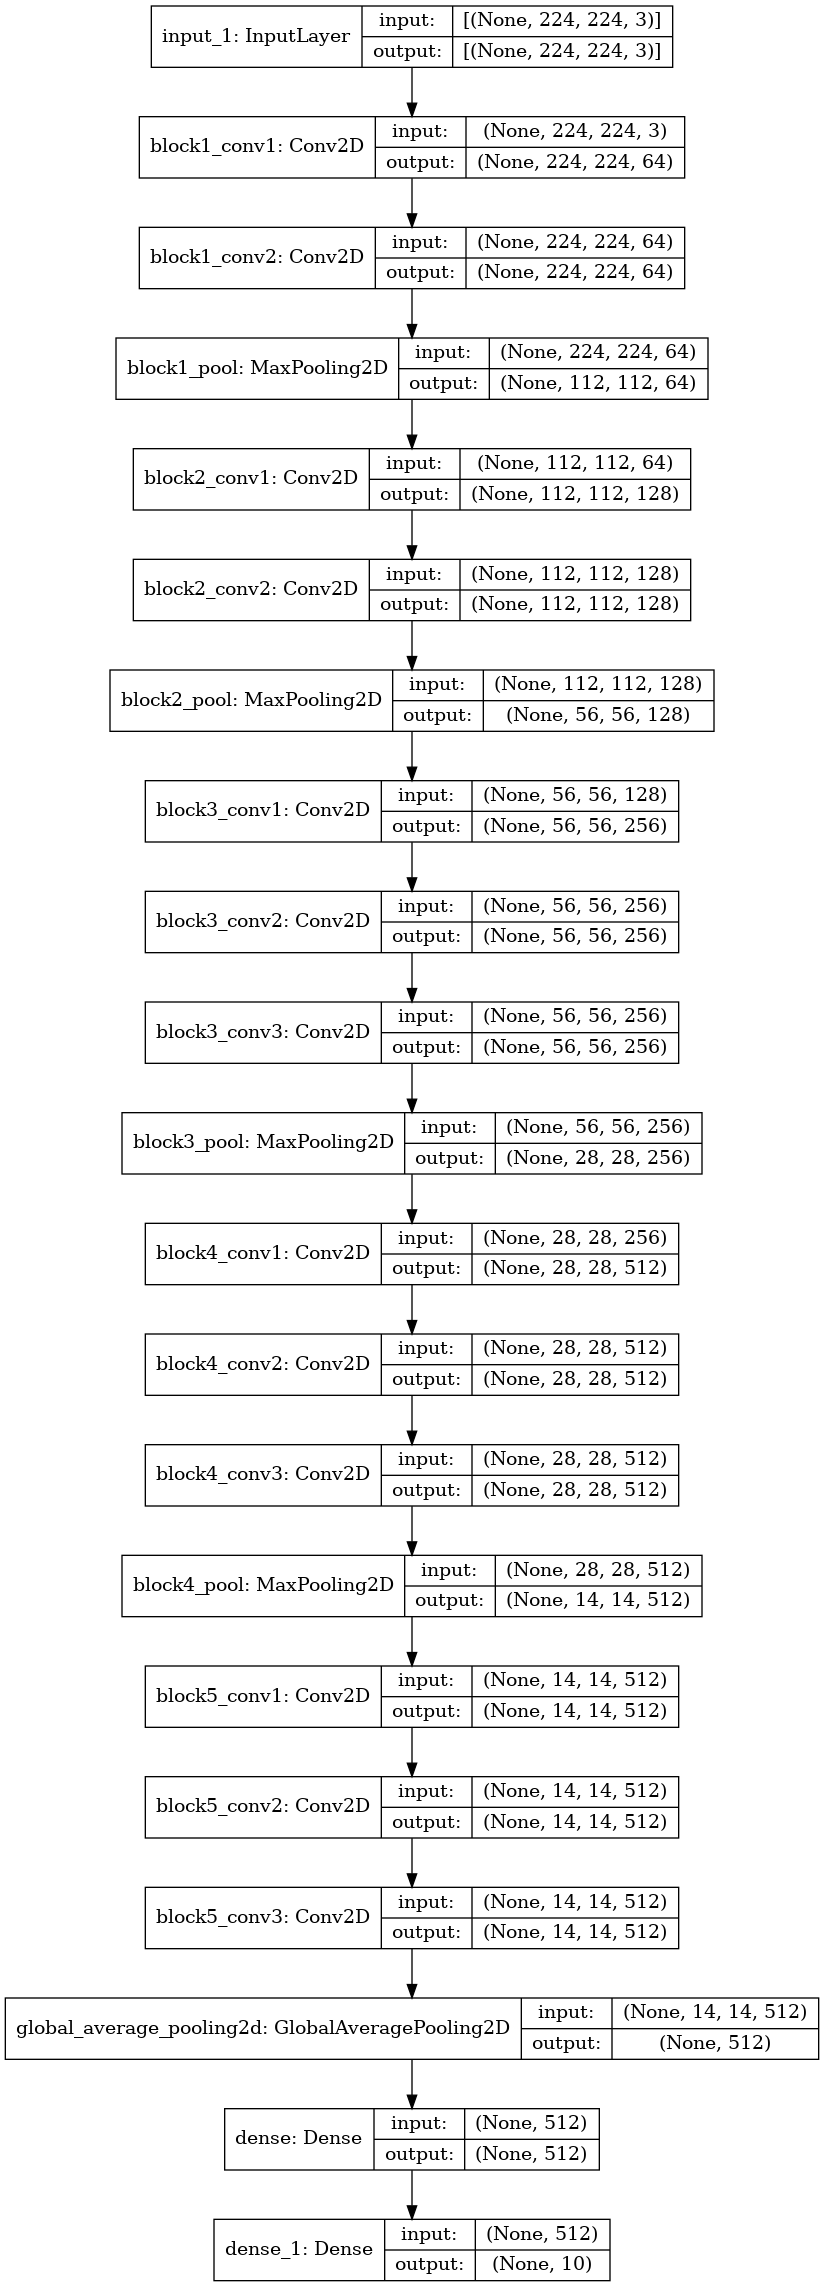

In [21]:
keras.utils.plot_model(model,show_shapes=True)

# Determine callbacks

---


In [22]:
earlystopping = EarlyStopping(monitor="val_loss", patience=6, mode="min")

checkpoint = ModelCheckpoint(model_name, monitor="val_loss", verbose=1, 
                             save_best_only=True, save_weights_only=True, mode="min")

learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, 
                                            min_lr=1e-7, verbose=1, mode="min")

In [23]:
train_steps=train_generator.samples//batch_size
valid_steps=validation_generator.samples//batch_size
print(train_steps)
print(valid_steps)

612
75


# Training

---

In [24]:
init_time = datetime.datetime.now()
history = model.fit(train_generator,
                    epochs=Epochs,
                    validation_data=validation_generator,
                    steps_per_epoch=train_steps,
                    validation_steps=valid_steps,
                    callbacks=[checkpoint,earlystopping,learning_rate_reduction],
                   verbose=1)
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

2022-12-14 09:33:50.713453: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-12-14 09:33:53.703027: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


612/612 [==============================] - 419s 654ms/step - loss: 0.8538 - accuracy: 0.7160 - val_loss: 0.5495 - val_accuracy: 0.8188

Epoch 00001: val_loss improved from inf to 0.54951, saving model to model.h5
Epoch 2/30
612/612 [==============================] - 340s 555ms/step - loss: 0.3829 - accuracy: 0.8788 - val_loss: 0.2959 - val_accuracy: 0.9042

Epoch 00002: val_loss improved from 0.54951 to 0.29585, saving model to model.h5
Epoch 3/30
612/612 [==============================] - 336s 548ms/step - loss: 0.3023 - accuracy: 0.9035 - val_loss: 0.4025 - val_accuracy: 0.8846

Epoch 00003: val_loss did not improve from 0.29585
Epoch 4/30
612/612 [==============================] - 338s 551ms/step - loss: 0.2475 - accuracy: 0.9214 - val_loss: 0.2296 - val_accuracy: 0.9312

Epoch 00004: val_loss improved from 0.29585 to 0.22959, saving model to model.h5
Epoch 5/30
612/612 [==============================] - 335s 547ms/step - loss: 0.2229 - accuracy: 0.9289 - val_loss: 0.2356 - val_accu

# Show minimum validation loss

---

In [25]:
history_df = pd.DataFrame(history.history)
min_loss=history_df['val_loss'].min()
print("Minimum Validation Loss: {:0.4f}".format(min_loss));

Minimum Validation Loss: 0.1742


# Visualize train loss and validation loss

---

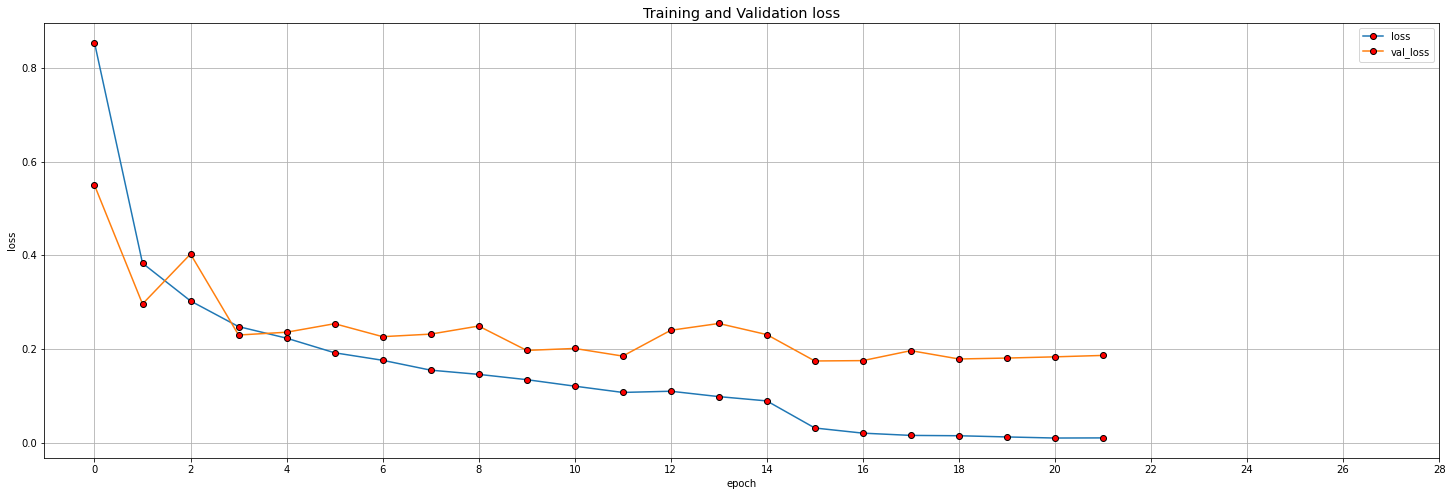

In [26]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize =(25,8), marker = "o", mfc = "r")
plt.style.use('classic')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 30, 2))
plt.show()

# Visualize train accuracy and validation accuracy

---

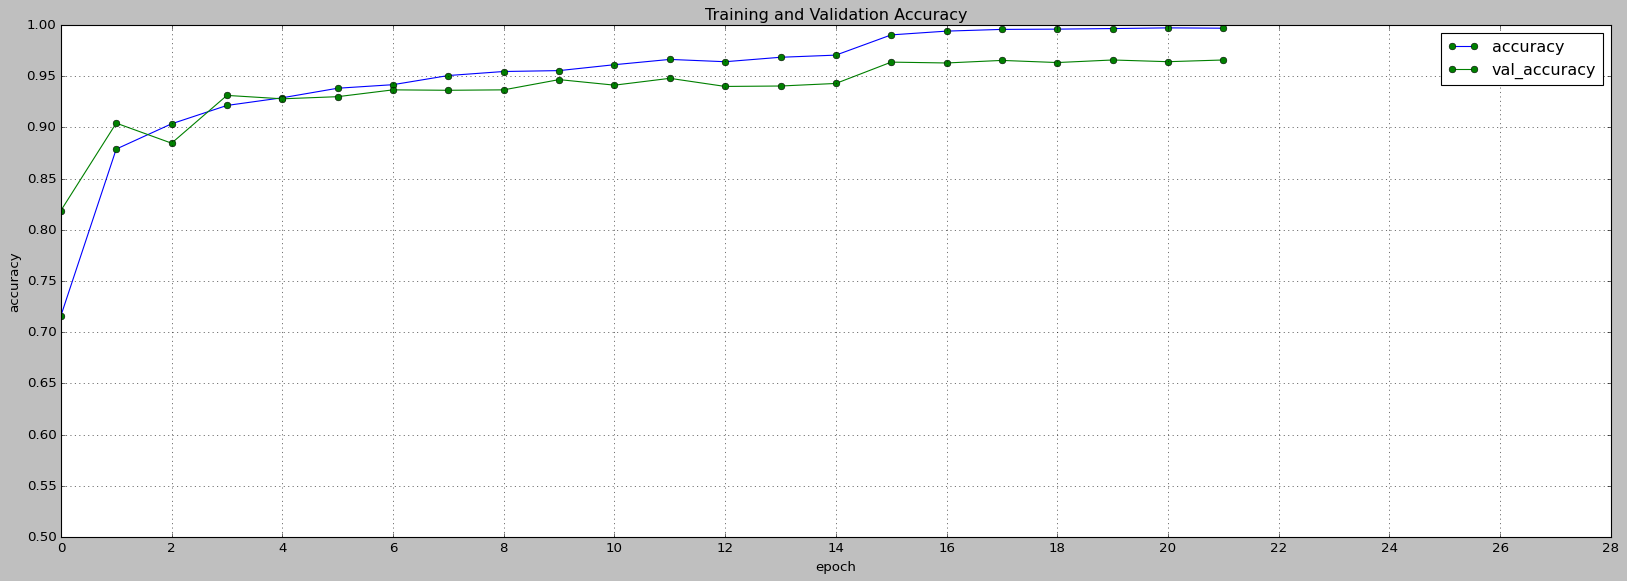

In [27]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(figsize =(25,8), marker = "o", mfc = "g")

plt.style.use('classic')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 30, 2))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

# Loading best weights and testing

---

In [28]:
model.load_weights(model_name.format(min_loss))

test_steps = test_generator.samples // batch_size

test_loss, test_acc = model.evaluate(test_generator,steps=test_steps)

68/68 [==============================] - 20s 288ms/step - loss: 0.1633 - accuracy: 0.9628


# Show accuracy

---

In [29]:
print('\naccuracy: {}%'.format(round(test_acc*100,2)), '\nloss: {:0.4f}'.format(test_loss))


accuracy: 96.28% 
loss: 0.1633


# Visualize accuracy

---

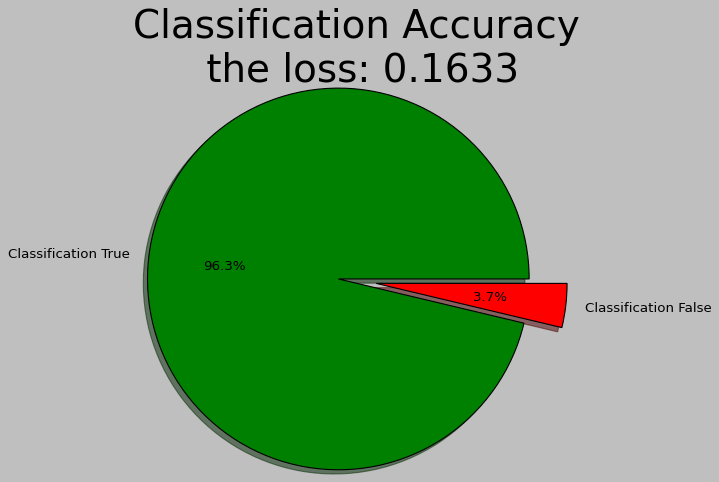

In [30]:
plt.style.use('classic')
plt.pie([test_acc,1-test_acc],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title('Classification Accuracy\n the loss: {:0.4f}'.format(test_loss),fontsize=35)
plt.show()

# Show confusion matrix

---

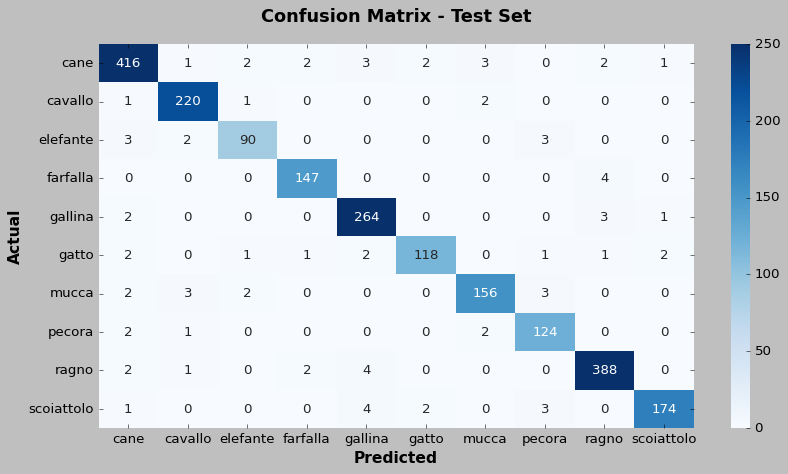

In [38]:
y_pred=model.predict(test_generator)
predictions=np.array(list(map(lambda x:np.argmax(x),y_pred)))
y_true=test_generator.classes
CMatrix=pd.DataFrame(confusion_matrix(y_true,predictions),columns=classes,index=classes)
plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [39]:
print(y_true[:10])
print(predictions[:10])

[5, 9, 8, 6, 4, 9, 9, 3, 1, 0]
[5 9 8 6 4 9 9 3 1 0]


# Show claasification report

---

In [40]:
print(classification_report(y_true,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       432
           1       0.96      0.98      0.97       224
           2       0.94      0.92      0.93        98
           3       0.97      0.97      0.97       151
           4       0.95      0.98      0.97       270
           5       0.97      0.92      0.94       128
           6       0.96      0.94      0.95       166
           7       0.93      0.96      0.94       129
           8       0.97      0.98      0.98       397
           9       0.98      0.95      0.96       184

    accuracy                           0.96      2179
   macro avg       0.96      0.96      0.96      2179
weighted avg       0.96      0.96      0.96      2179



# Analyzing model
---
### 1. Saliency maps : is an image that highlights the region on which people's eyes focus first

In [274]:
import tensorflow as tf

def saliency_map(img):
    plt.imshow(img/255.0)
    plt.show()

    x = tf.Variable(np.expand_dims(img, 0), dtype='float32')

    with tf.GradientTape() as tape:
        result = model(x)
        y = result[:, np.argmax(result)]
        grads = tape.gradient(y, x)

    grads_2d = grads.numpy()[0].max(axis=2)
    grads_2d_norm = (grads_2d - grads_2d.min())/(grads_2d.max() - grads_2d.min())

    grads_2d_uint8 = (grads_2d_norm*255.0).astype('uint8')
    _, grads_2d_bin = cv2.threshold(grads_2d_uint8, 0, 255, cv2.THRESH_OTSU)
    plt.imshow(grads_2d_bin, cmap='gray')
    plt.show()
    
    print(classes[np.argmax(result)])

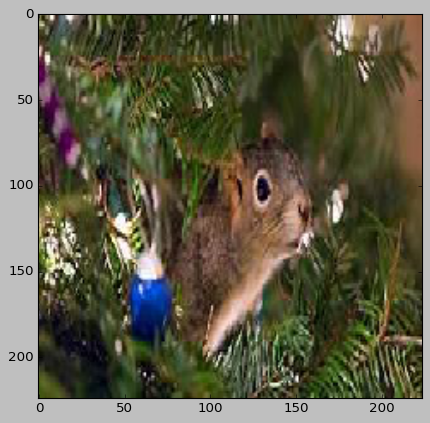

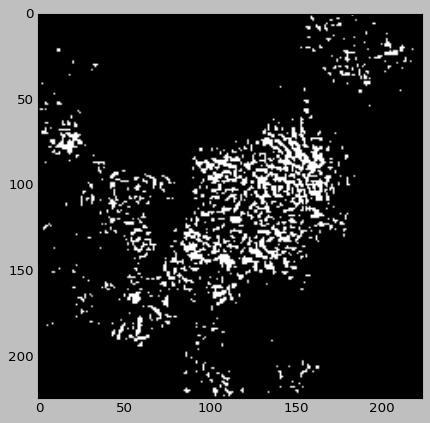

scoiattolo


In [275]:
img = test_generator[0][0][5]
saliency_map(img)

### 2. Gradient-weighted Class Activation Mapping (Grad-CAM)
---
#### using grad-cam to know what important parts of image that model concentrate on it to classify 10 classes of animals

In [280]:
def find_true_class(file_path):
    true_class = None
    if 'cane' in file_path:
        true_class = 'cane'
    elif 'cavallo' in file_path:
        true_class = 'cavallo'
    elif 'elefante' in file_path:
        true_class = 'elefante'
    elif 'farfalla' in file_path:
        true_class = 'farfalla'
    elif 'gallina' in file_path:
        true_class = 'gallina'
    elif 'gatto' in file_path:
        true_class = 'gatto'
    elif 'mucca' in file_path:
        true_class = 'mucca'
    elif 'pecora' in file_path:
        true_class = 'pecora'
    elif 'ragno' in file_path:
        true_class = 'ragno'
    elif 'scoiattolo' in file_path:
        true_class = 'scoiattolo'
    return true_class

In [281]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap, top_pred_index.numpy()


In [282]:
# https://keras.io/examples/vision/grad_cam/
def superimposed_img(img, heatmap,pred_class,pred_prob_final):

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  # Display Grad CAM

  plt.matshow(superimposed_img)

  plt.xticks([])
  plt.yticks([])

  plt.title('Predict: '+str(pred_class)+'\n Confidence: '+str(pred_prob_final)+"%",fontsize=25, weight='bold');

  plt.show()




In [283]:
# label smoothing https://www.linkedin.com/pulse/label-smoothing-solving-overfitting-overconfidence-code-sobh-phd/
def categorical_smooth_loss(y_true, y_pred, label_smoothing=0.1):
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [463]:
last_conv_layer_name='block5_conv2'
classifier_layer_names = [
    'block5_conv1',
    'block5_conv2',
    'block5_conv3',
    'global_average_pooling2d',
    "dense",
    "dense_1"

]

In [464]:
def img_rgb(img_test_path):

    test_image=cv2.imread(img_test_path,cv2.IMREAD_COLOR)
    test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    test_image=cv2.resize(test_image,(224,224))
    
    return test_image 


def imshow(img_test_path):
    
    img_test_list=list(img_test_path.split('/'))
    test_image=img_rgb(img_test_path)
    plt.xticks([])
    plt.yticks([])
    plt.title('the Actual Class: {}'.format(img_test_list[-2]),fontsize=25)
    plt.imshow(test_image)
    plt.show()
    

    
def show_visual_img(img_test_path):
    
    test_image=img_rgb(img_test_path)
    
    test_image=np.expand_dims(test_image,axis=0)
    
    img=img_rgb(img_test_path)
    
    img=np.expand_dims(img,axis=0)

    img=img/255.0
    
    score = model.predict(img)


    pred_class_num=np.argmax(score)
    print(pred_class_num)
    pred_class=class_dict[pred_class_num]
    print(pred_class)

    pred_prob=np.max(score) * 100
    print(pred_prob)
    pred_prob_final=round(pred_prob,2)

    heatmap, top_index = make_gradcam_heatmap(test_image, 
                                              model, 
                                              last_conv_layer_name, 
                                              classifier_layer_names)

    superimposed_img(test_image[0], heatmap,pred_class,pred_prob_final)
    
    


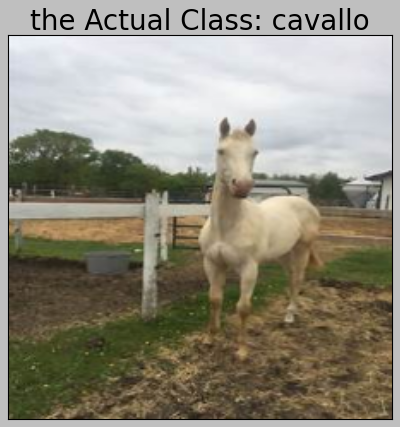

1
cavallo
99.97093081474304


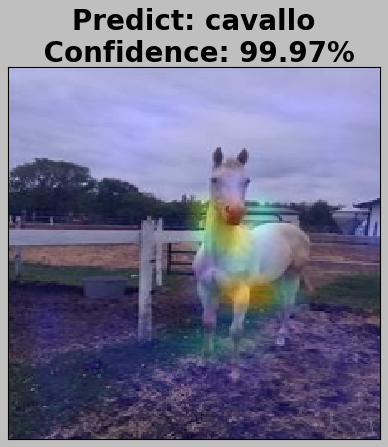

In [474]:
img_test_path='/kaggle/input/animals10/raw-img/cavallo/OIP--2wbTZUIHhYse3zlp1S4WQHaJ3.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

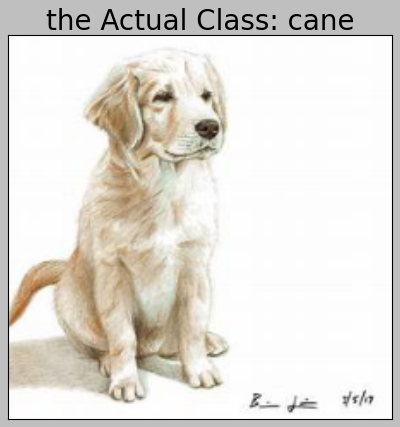

0
cane
100.0


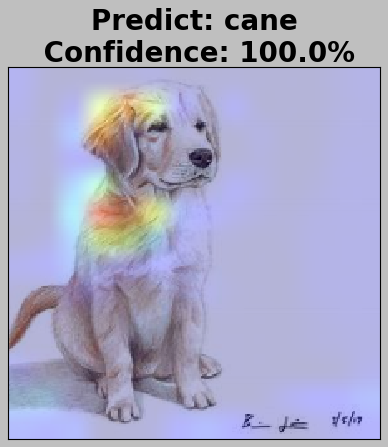

In [482]:
img_test_path='/kaggle/input/animals10/raw-img/cane/OIP--L1ZAWylA3UTTMGC0_WF0wHaIA.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

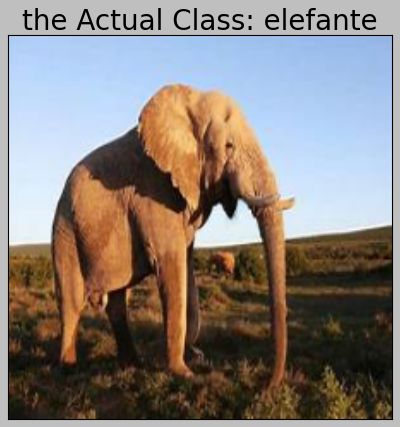

2
elefante
99.99998807907104


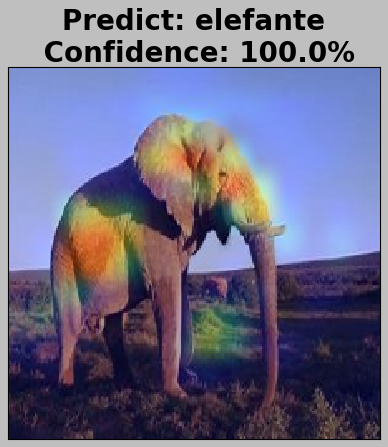

In [477]:
img_test_path='/kaggle/input/animals10/raw-img/elefante/OIP--J8rTRP-zHNg0b0dWPYdzwHaE7.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

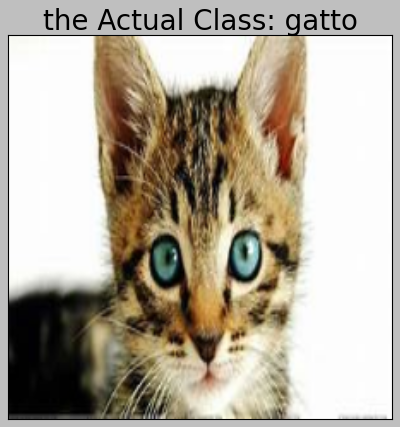

5
gatto
99.99980926513672


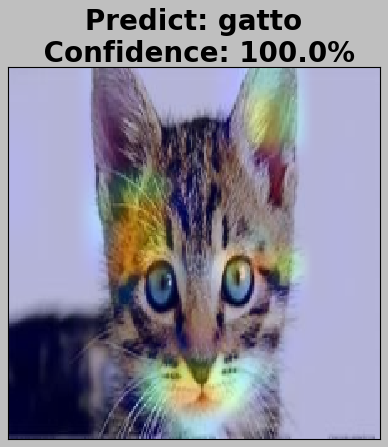

In [478]:
img_test_path='/kaggle/input/animals10/raw-img/gatto/1001.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

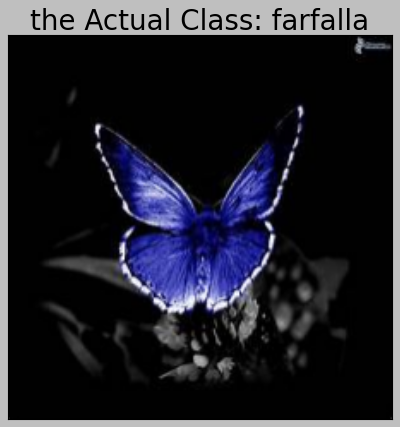

3
farfalla
100.0


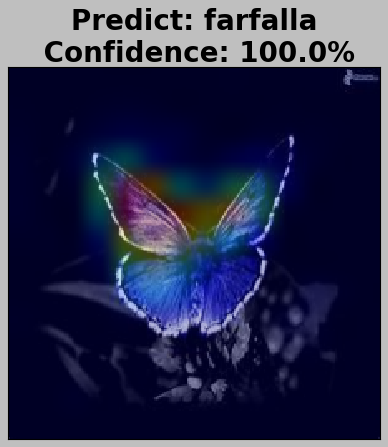

In [486]:
img_test_path='/kaggle/input/animals10/raw-img/farfalla/OIP-05XApkSfFPeJvmujAIqQxQHaFj.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

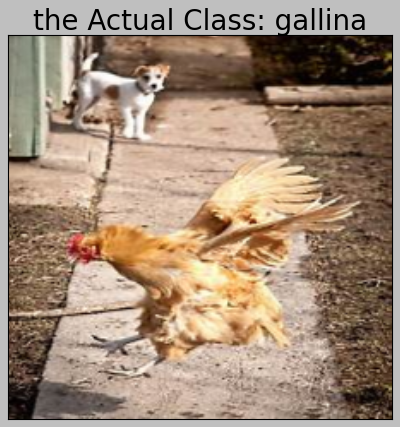

4
gallina
99.84487295150757


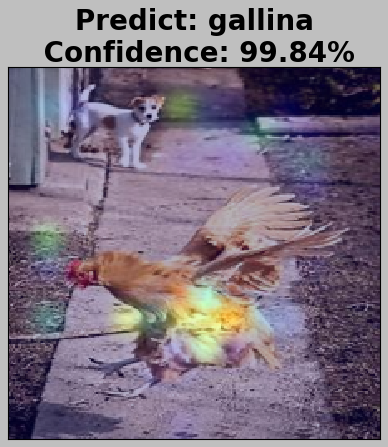

In [491]:
img_test_path='/kaggle/input/animals10/raw-img/gallina/1041.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

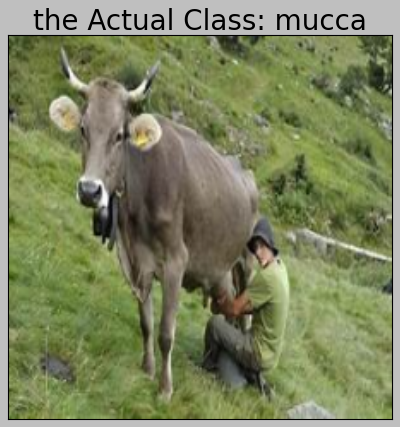

6
mucca
100.0


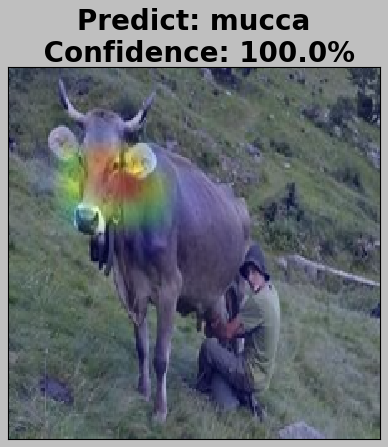

In [492]:
img_test_path='/kaggle/input/animals10/raw-img/mucca/OIP--J6CeZMVXOrkZiMpXV8qWwHaE0.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

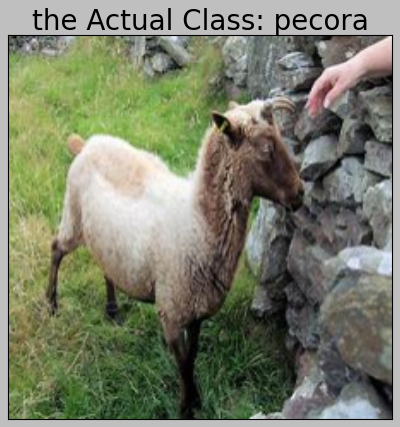

7
pecora
99.99953508377075


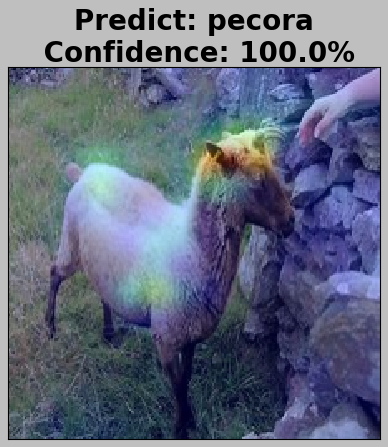

In [497]:
img_test_path='/kaggle/input/animals10/raw-img/pecora/OIP-05oSplXHIW447KwcLJs1EQHaFj.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

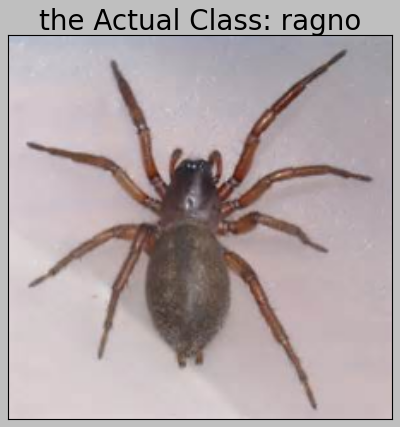

8
ragno
100.0


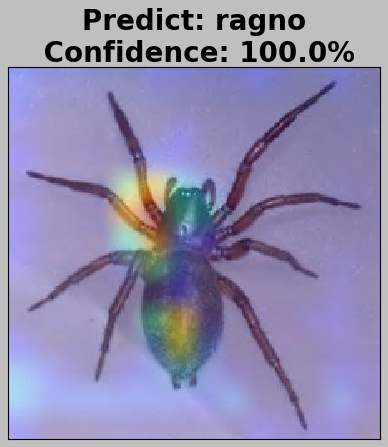

In [500]:
img_test_path='/kaggle/input/animals10/raw-img/ragno/OIP--GmPAqwu-0wHdqeiuNoOLQElEs.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)

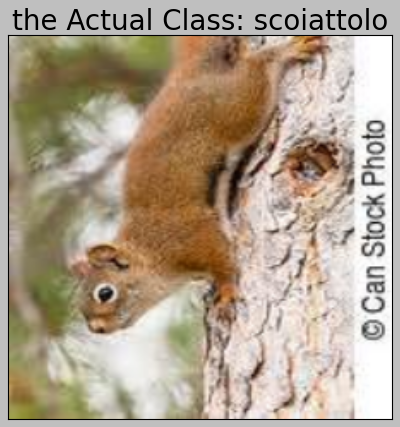

9
scoiattolo
99.99998807907104


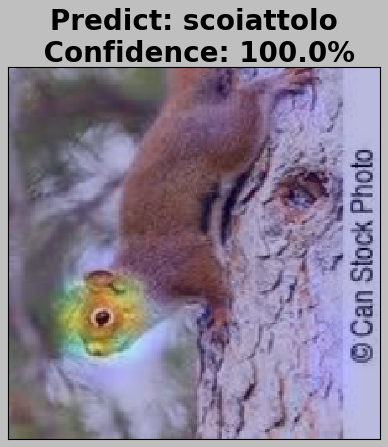

In [507]:
img_test_path='/kaggle/input/animals10/raw-img/scoiattolo/OIP--JsYytBOeN57ZDVwmxqsOwAAAA.jpeg'
imshow(img_test_path)
show_visual_img(img_test_path)